# CS105 Final Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.cluster import KMeans 

Read data in from json file

In [2]:
reviews = pd.read_json('reviews_Amazon_Instant_Video_5.json', lines=True)
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,"[0, 0]",I had big expectations because I love English ...,2,A little bit boring for me,1399075200,"05 3, 2014"
1,A3BC8O2KCL29V2,B000H00VBQ,Carol T,"[0, 0]",I highly recommend this series. It is a must f...,5,Excellent Grown Up TV,1346630400,"09 3, 2012"
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""","[0, 1]",This one is a real snoozer. Don't believe anyt...,1,Way too boring for me,1381881600,"10 16, 2013"
3,A1RJPIGRSNX4PW,B000H00VBQ,"J. Kaplan ""JJ""","[0, 0]",Mysteries are interesting. The tension betwee...,4,Robson Green is mesmerizing,1383091200,"10 30, 2013"
4,A16XRPF40679KG,B000H00VBQ,Michael Dobey,"[1, 1]","This show always is excellent, as far as briti...",5,Robson green and great writing,1234310400,"02 11, 2009"


Distribution of star ratings 

<AxesSubplot:>

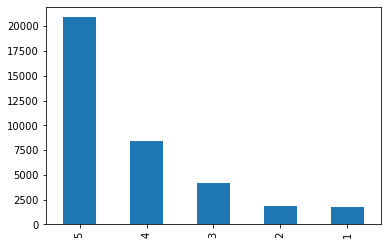

In [3]:
reviews['overall'].value_counts().plot(kind='bar')

Create cdf for bag of words model

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', min_df=100)

cdf = vectorizer.fit_transform(reviews['reviewText'])

Print out vocabulary for bag of words model

In [20]:
vectorizer.get_feature_names_out()

array(['10', '100', '11', ..., 'younger', 'zombie', 'zombies'],
      dtype=object)

Turn cdf into bag of words matrix

In [18]:
bag = pd.DataFrame(cdf.toarray(), columns=vectorizer.get_feature_names_out())
bag

,10,100,11,12,13,14,15,16,18,1st,...,wrote,yeah,year,years,yes,york,young,younger,zombie,zombies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
37124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Split data into testing set(20%) and training set(80%)

In [7]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

x = bag.values
y = reviews['overall'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Create the Multi-layer perceptron regressor

In [8]:
mlp = MLPRegressor(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
print(1)

1


Train our multi-layer perceptron on the training data

In [9]:
mlp.fit(x_train, y_train)
print(1)

1


Predict the values of testing and training reviews using our multi-layer perceptron

In [22]:
predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

Error values on training set

In [80]:
from sklearn.metrics import classification_report,confusion_matrix
print('Mean absolute error: ', sum(abs(y_train - predict_train))/len(y_train))
print('Mean squared error: ', sum((y_train - predict_train) * (y_train - predict_train))/len(y_train))

Mean absolute error:  0.2417706118235043
Mean squared error:  0.12073157309429125


Visualizing the error between y_train and predict_train

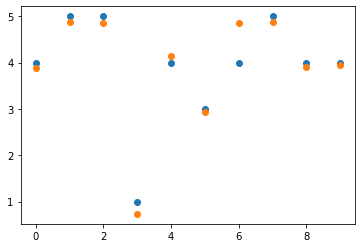

In [102]:
y_t = pd.DataFrame(y_train, columns=['rating'])
y_t = y.iloc[0:10, :]
plt.scatter(y_t.index, y_t['rating'])

p_t = pd.Series(predict_train)
p_t = p_t[0:10]
plt.scatter(p_t.index, p_t)

plt.show()

Error values on testing set

In [12]:
print('Mean absolute error: ', sum(abs(y_test - predict_test))/len(y_train))
print('Mean squared error: ', sum((y_test - predict_test) * (y_test - predict_test))/len(y_train))

Mean absolute error:  0.20002312173295003
Mean squared error:  0.36198992483588016


Visualizing the error between y_test and predict_test

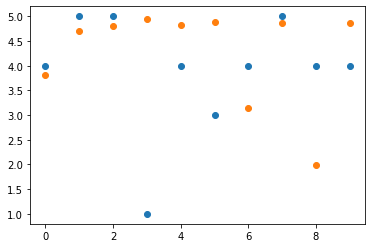

In [105]:
y_t = pd.DataFrame(y_test, columns=['rating'])
y_t = y.iloc[0:10, :]
plt.scatter(y_t.index, y_t['rating'])

p_t = pd.Series(predict_test)
p_t = p_t[0:10]
plt.scatter(p_t.index, p_t)

plt.show()

Difference between review star rating and prediction for first 100 reviews in dataset

In [13]:
for i in range(100):
    print(y_test[i]-predict_test[i])

1.1806463786506418
-1.7059815961035047
0.19954826545412363
0.06414904100214436
0.16995848126089808
0.12176198080531453
1.8467419497072335
0.1395714708939657
2.0139053851918822
0.1359184261039177
-0.8476459973896331
0.3225359010480666
0.17285362492553347
-0.8314184047814575
0.20464719301840795
1.1251089789652269
0.17215419651454855
-0.7588604477250565
-0.832918868272281
-0.8245422290212501
3.5235784423568726
0.13227877993320458
3.8534854894238038
0.26272226575477475
0.21320790069737505
0.13359695737671462
0.5012356243795457
0.08734694194207204
0.1525145561466248
0.2911087335569391
0.22454783214637608
-1.9136192537773367
1.3751543377838393
0.14360746635001487
0.11276382161623921
0.18540285505441112
-0.7958696050486447
0.2530654321814092
1.390346178935399
-0.5587568089132784
2.2669378330971037
0.026237853315734583
0.23404343455254306
2.1879128424670267
-0.9204585696312444
0.2736628091477833
0.20385867717154404
0.15874879717437995
0.21261022406549834
0.1973311771522459
0.16347234841683456
